### Lloguer en Barcelona enfocat a ciutats.

1. Analisis del context de la demanda a la ciutat


5. Intentar predir la pujada/baixada de demanda de lloguers a Barcleona

In [2]:
import feedparser
import pprint
import requests 
import pandas as pd
import numpy as np

# Pas 1: Descarregar les dades

In [3]:
# Listado de data sets disponible en opendata   
parameters = {'rows': '1000'}

url = 'http://opendata-ajuntament.barcelona.cat/data/api/3/action/package_search'
response = requests.get(url,params=parameters)
# Incluimos a tabla pandas Data sets contienen diferentes fuentes de datos columna resources
catalogo = pd.DataFrame(response.json()['result']['results']) 

# Creamos tabla con las fuentes de datos del catalogo

i = 0
for index, row in catalogo.iterrows():
    if i== 0:
        fuente_datos = pd.DataFrame(row['resources']) 
        fuente_datos['code'] = row['code']   
    i = 1
    aux =  pd.DataFrame(row['resources'])
    aux['code'] = row['code']
    fuente_datos = fuente_datos.append(aux)
fuente_datos = fuente_datos[['code','size', 'description', 'format' , 'downloads_absolute', 'token_required', 'url',  'name']]    

In [4]:
catalogo[['code', 'title', 'frequency', 'fuente', 'relationships_as_object']]
catalogo.code.unique()

array(['np-piscines', ' np-molls', 'np-platges', 'np-quioscs-tramits',
       'np umbracles', 'np-jardins interiors illa', 'np-jardins-botanics',
       'np-espais-gimnastica', 'np-plantes depuradores ', 'np-esculleres',
       'np-illes-vianants', 'np-circuits-caminar-correr',
       'np-nasia-diposits-aigues-pluvials', 'np-nasia-fossars',
       'np-nasia-miradors', 'aut-terrasses-excep-decret_21_5',
       'xarxa-refugis-climatics', 'consolats-bcn',
       'arees-esbarjo-gossos-bcn', 'renda-disponible-llars-bcn',
       'NP-ASIA_DipositsVehicles_BCN', 'bancs-del-temps-bcn',
       'lloguer-de-vehicles', 'funiculars', 'teleferics',
       'estacions maritimes', 'administracio estatal',
       'comissaries policia', 'galeries comercials', 'grans establiments',
       'grans centres comercials', 'cementiris', 'tanatoris',
       'administracio municipal', 'administracio autonomica',
       'SUBVENCIONS_A_ENS_PUBLICS-NO-INTEGRATS-CERCADOR-POST 2019',
       'arbrat parcs', 'estat-ports-

In [5]:
# Datasets on hi han la mitja mensual de lloguer per barris de Barcelona
ds_mitja_mensual = fuente_datos[fuente_datos.code == 'Est_Mercat_Immobiliari_Lloguer_Mitja_Mensual' ]

# Datasets on hi han el numero de contrates per barris de Barcelona
ds_numero_contractes = fuente_datos[fuente_datos.code == 'Est_Mercat_Immobiliari_Numero_Contractes' ]

# Datasets on hi han la superficie per barris de Barcelona
ds_superficie_mitjana = fuente_datos[fuente_datos.code == 'Est_Mercat_Immobiliari_Lloguer_Superficie_Mitjana' ]


# Datasets on tenim la renda mitjana en les diferents llars de bcn

ds_renta_llars = fuente_datos[fuente_datos.code == 'renda-disponible-llars-bcn' ]




In [6]:

for ds in ds_mitja_mensual.iterrows():
    print(ds[1]['name'])
    
print('------')

for ds in ds_renta_llars.iterrows():
    print(ds[1]['name'])



2021_lloguer_preu_trim.csv
2020_Lloguer_preu_trim.csv
2019_Lloguer_preu_trim.csv
2018_Lloguer_preu_trim.csv
2017_Lloguer_preu_trim.csv
2016_Lloguer_preu_trim.csv
2015_Lloguer_preu_trim.csv
2014_Lloguer_preu_trim.csv
------
2018_Renda_disponible_llars.csv
2017_Renda_disponible_llars.csv
2016_Renda_disponible_llars.csv
2015_Renda_disponible_llars.csv


In [7]:

mitja_mensual_all = []
renda_mensual_all = []

for dataset in ds_mitja_mensual.iterrows():
    df = pd.read_csv(dataset[1]['url'], sep=',', encoding='utf-8')
    mitja_mensual_all.append(df)
    
for dataset in ds_renta_llars.iterrows():
    df = pd.read_csv(dataset[1]['url'], sep=',', encoding='utf-8')
    renda_mensual_all.append(df)
    
cases = pd.concat(mitja_mensual_all, axis=0, ignore_index=True)
rendas = pd.concat(renda_mensual_all, axis=0, ignore_index=True)

print(cases.shape)
print(rendas.shape)

(4380, 8)
(292, 6)


# PAS 2 : Analisis de les dades.

In [8]:
cases.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [9]:
rendas.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Import_€_Any
0,2018,1,Ciutat Vella,1,el Raval,12351
1,2018,1,Ciutat Vella,2,el Barri Gòtic,14598
2,2018,1,Ciutat Vella,3,la Barceloneta,16271
3,2018,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",17803
4,2018,2,Eixample,5,el Fort Pienc,21890


Unirem els dos datasets pels camps comuns.

In [10]:

frame = pd.merge(cases, rendas, on=['Any', 'Codi_Districte', 'Nom_Districte','Codi_Barri', 'Nom_Barri' ], how='inner')
# res.Any.unique()

frame.shape

(2336, 9)

In [11]:
frame.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Import_€_Any
0,2018,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),792.74,12351
1,2018,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),820.88,12351
2,2018,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),849.32,12351
3,2018,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),827.27,12351
4,2018,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),13.74,12351


In [12]:
frame = frame[~frame.Lloguer_mitja.str.contains('Lloguer mitjà per superfície')]

frame['Renda_Mitjana_Mensual'] = frame['Import_€_Any'] / 12

In [13]:
frame.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Import_€_Any,Renda_Mitjana_Mensual
0,2018,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),792.74,12351,1029.25
1,2018,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),820.88,12351,1029.25
2,2018,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),849.32,12351,1029.25
3,2018,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),827.27,12351,1029.25
8,2018,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),998.40,14598,1216.50


In [14]:
frame.groupby('Any').describe()

Trimestre                                           Codi_Districte  \
         count mean       std  min   25%  50%   75%  max          count   
Any                                                                       
2015     292.0  2.5  1.119953  1.0  1.75  2.5  3.25  4.0          292.0   
2016     292.0  2.5  1.119953  1.0  1.75  2.5  3.25  4.0          292.0   
2017     292.0  2.5  1.119953  1.0  1.75  2.5  3.25  4.0          292.0   
2018     292.0  2.5  1.119953  1.0  1.75  2.5  3.25  4.0          292.0   

                ... Import_€_Any          Renda_Mitjana_Mensual               \
          mean  ...          75%      max                 count         mean   
Any             ...                                                            
2015  6.246575  ...      22082.0  33899.0                 292.0  1583.144977   
2016  6.246575  ...      22389.0  37501.0                 292.0  1634.624429   
2017  6.246575  ...      21694.0  38449.0                 292.0  1648.407534   
2018  6.246575  ...      22757.0  38270.0                 292.0  1696.497717   

                                                                     \
             std         min          25%          50%          75%   
Any                                                                   
2015  449.825795  850.250000  1262.666667  1553.166667  1840.166667   
2016  497.197922  871.416667  1262.250000  1586.166667  1865.750000   
2017  511.304151  879.500000  1262.833333  1595.583333  1807.833333   
2018  486.721946  946.916667  1355.916667  1664.583333  1896.416667   

                   
              max  
Any                
2015  2824.916667  
2016  3125.083333  
2017  3204.083333  
2018  3189.166667  

[4 rows x 48 columns]

In [15]:
frame.Any.unique()

array([2018, 2017, 2016, 2015], dtype=int64)

10


Text(0, 0.5, 'Preu Mitjà')

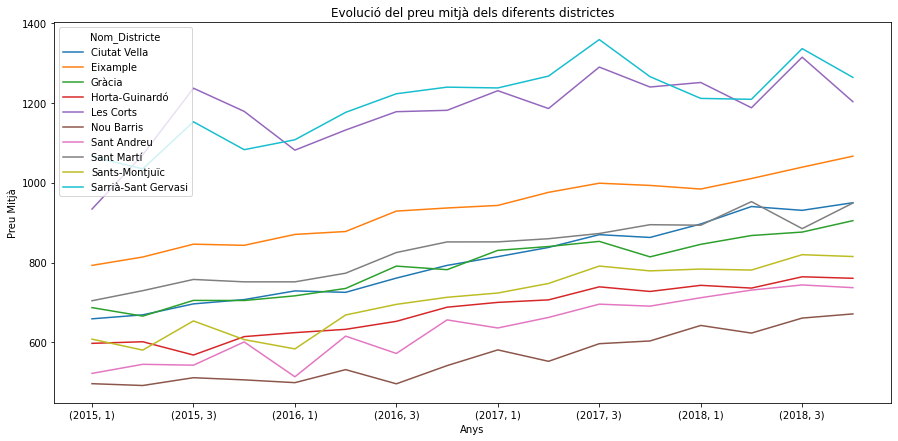

In [16]:
# histograma por barrio precio

import matplotlib.pyplot as plt


districtes = frame.Nom_Districte.unique()
print(districtes.size)

fig, ax = plt.subplots(figsize=(15,7))
preu_mitj_per_districte = frame.groupby(['Any', 'Trimestre', 'Nom_Districte']).Preu.mean()


plot = preu_mitj_per_districte.unstack().plot(ax=ax, label='hola')
ax.set_xlabel('Anys')
ax.set_title('Evolució del preu mitjà dels diferents districtes')
ax.set_ylabel('Preu Mitjà')
    

In [17]:

# fig, ax = plt.subplots(figsize=(30,7))
preu_mitj_per_barri = preu_mitj_per_districte = frame.groupby(['Nom_Districte', 'Nom_Barri', 'Any']).Preu.mean()

preu_mitj_per_barri
    

Nom_Districte        Nom_Barri                              Any 
Ciutat Vella         Sant Pere, Santa Caterina i la Ribera  2015     721.4475
                                                            2016     806.6350
                                                            2017     916.8375
                                                            2018     971.5800
                     el Barri Gòtic                         2015     782.9850
                                                                      ...    
Sarrià-Sant Gervasi  el Putxet i el Farró                   2018     993.0875
                     les Tres Torres                        2015    1380.3525
                                                            2016    1512.7850
                                                            2017    1627.2025
                                                            2018    1598.6000
Name: Preu, Length: 292, dtype: float64

Grafica que descriu la evolució del preu en els diferents distrits

In [18]:

# renda_mitj_per_districte = frame.groupby(['Any', 'Trimestre', 'Nom_Districte']).Renda_Mitjana_Mensual.mean()

# plt.plot('Any','Preu', legend=True)

In [19]:
frame.corr()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu,Import_€_Any,Renda_Mitjana_Mensual
Any,1.000000e+00,1.582600e-15,-3.743574e-14,-1.995626e-14,0.272729,8.112745e-02,8.112745e-02
Trimestre,1.582600e-15,1.000000e+00,-1.748946e-16,-1.743029e-16,0.078936,8.652862e-17,7.650106e-17
Codi_Districte,-3.743574e-14,-1.748946e-16,1.000000e+00,9.808737e-01,-0.287433,-2.108445e-01,-2.108445e-01
Codi_Barri,-1.995626e-14,-1.743029e-16,9.808737e-01,1.000000e+00,-0.294827,-2.561496e-01,-2.561496e-01
Preu,2.727291e-01,7.893565e-02,-2.874330e-01,-2.948272e-01,1.000000,8.668494e-01,8.668494e-01
Import_€_Any,8.112745e-02,8.652862e-17,-2.108445e-01,-2.561496e-01,0.866849,1.000000e+00,1.000000e+00
Renda_Mitjana_Mensual,8.112745e-02,7.650106e-17,-2.108445e-01,-2.561496e-01,0.866849,1.000000e+00,1.000000e+00


<AxesSubplot:>

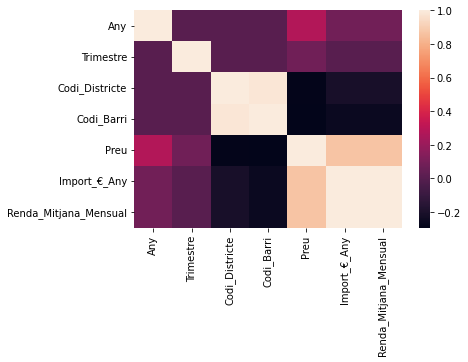

In [20]:
import seaborn as sns
sns.heatmap(frame.corr())

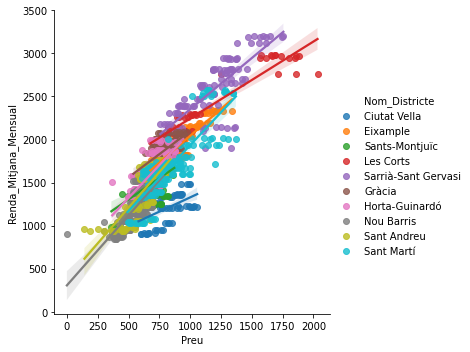

In [21]:
# scatter plot between Preu and Import Any

# frame.plot.scatter(x='Preu', y='Import_€_Any', c='Preu', colormap='viridis')

sns.lmplot(x='Preu',y='Renda_Mitjana_Mensual',data=frame,fit_reg=True, hue='Nom_Districte') 


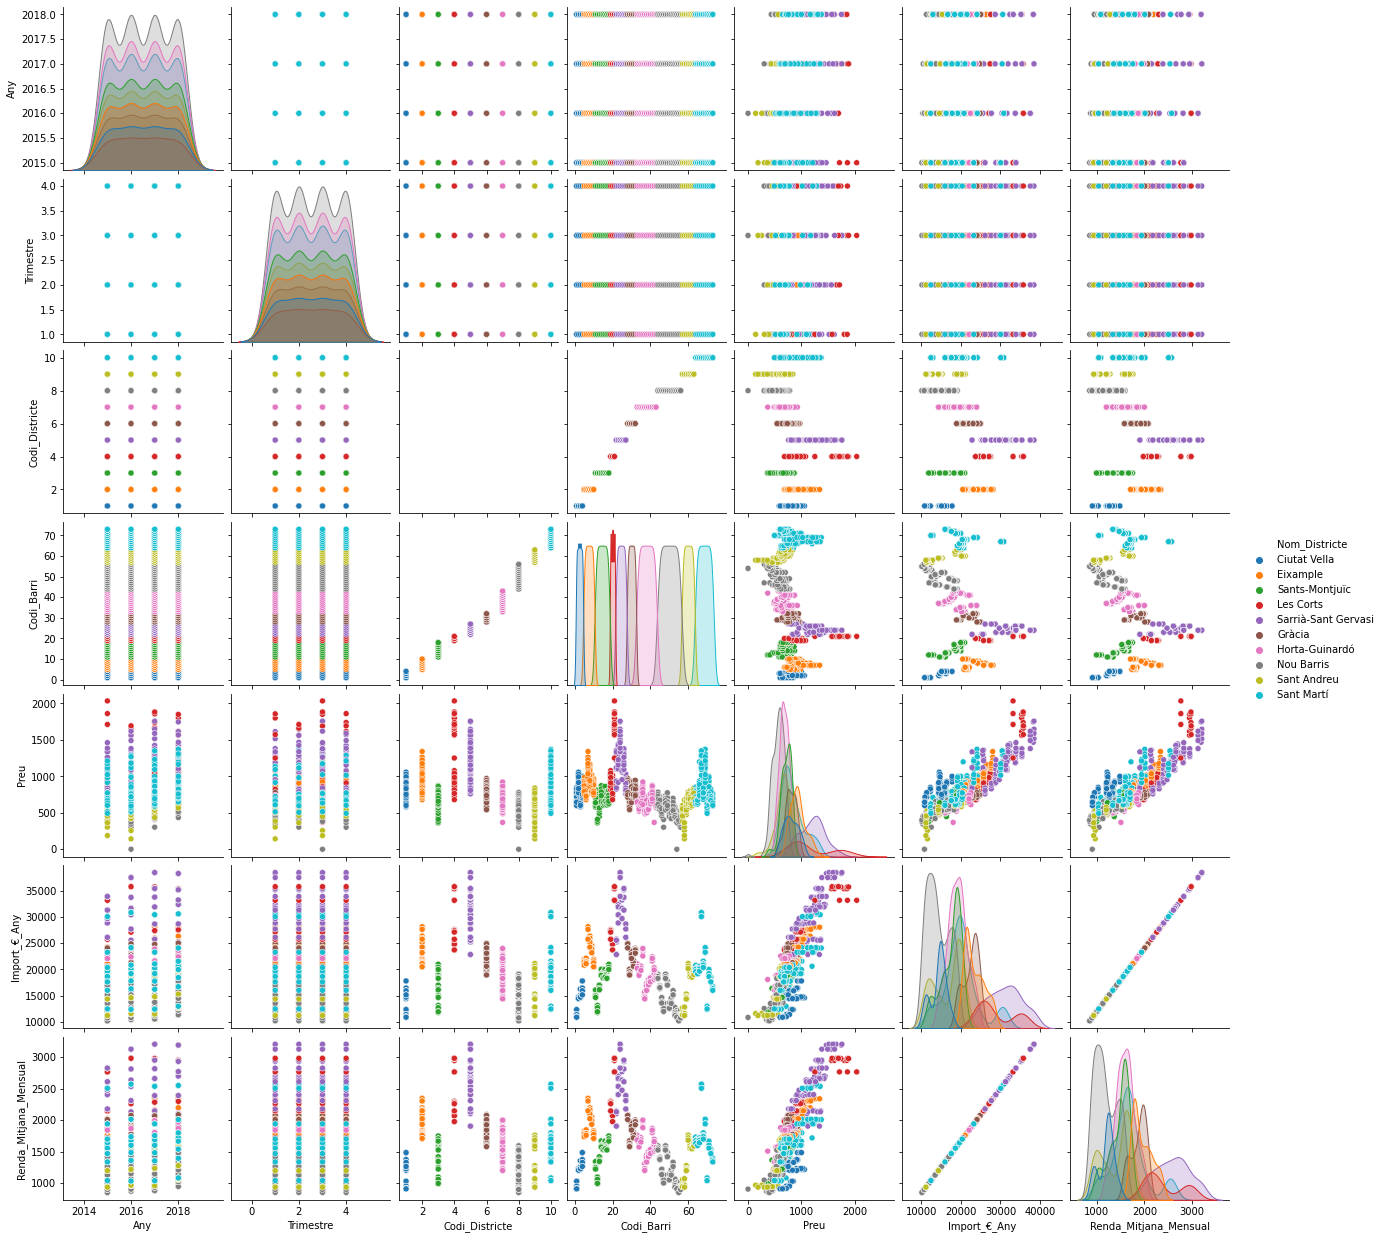

In [22]:
sns.pairplot(frame, hue='Nom_Districte')


# Pas 3: Prepara dades per a fer una predicció de la pujada/baixada de demanda de lloguers a Barcelona

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# import cross_val_score
from sklearn.model_selection import cross_val_score

In [31]:
frame.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Import_€_Any,Renda_Mitjana_Mensual
0,2018,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),792.74,12351,1029.25
1,2018,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),820.88,12351,1029.25
2,2018,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),849.32,12351,1029.25
3,2018,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),827.27,12351,1029.25
8,2018,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),998.40,14598,1216.50


In [41]:
frame.shape

frame
frame=frame.dropna(axis=0)
frame.head()
# frame = frame.drop(columns=['Nom_Districte', 'Nom_Barri', 'Lloguer_mitja'])


,Any,Trimestre,Codi_Districte,Codi_Barri,Preu,Import_€_Any,Renda_Mitjana_Mensual
0,2018,1,1,1,792.74,12351,1029.25
1,2018,2,1,1,820.88,12351,1029.25
2,2018,3,1,1,849.32,12351,1029.25
3,2018,4,1,1,827.27,12351,1029.25
8,2018,1,1,2,998.40,14598,1216.50


In [ ]:
frame=frame.drop('axis=')

In [49]:
y = frame['Preu'].values
X = frame.drop(columns=['Preu']).values

X = 
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y.shape
print(type(y))
X.shape

print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Accuracy: 0.830 [Linear Regression]
Accuracy: 0.949 [KNN]
Accuracy: 0.815 [ElasticNet]
Accuracy: 0.794 [KernelRidge]
Accuracy: 0.830 [BayesianRidge]
Accuracy: 0.964 [Gradient Boosting]
Accuracy: 0.992 [Random Forest]


<BarContainer object of 7 artists>

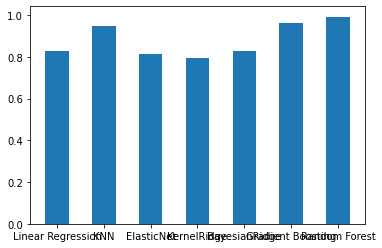

In [67]:
cv = 5

reg1 = LinearRegression()
reg2 = KNeighborsRegressor(n_neighbors=5)
reg3 = ElasticNet()
reg4 = KernelRidge()
reg5 = BayesianRidge()
reg6 = GradientBoostingRegressor()
reg7 = RandomForestRegressor()

# reg1.fit(X, y)
# reg1.score(X, y)

labels = ['Linear Regression','KNN', 'ElasticNet','KernelRidge', 'BayesianRidge', 'Gradient Boosting', 'Random Forest' ]
scores = []
for reg, label in zip([reg1, reg2, reg3, reg4, reg5, reg6, reg7], labels):
    reg.fit(X, y)
    # scores = cross_val_score(reg, X, y, cv=cv, scoring='accuracy')
    scores.append(reg.score(X, y))
    print("Accuracy: %0.3f [%s]" % (reg.score(X,y), label))
    
plt.bar(labels, scores, width=0.5)

    

